# (수업) 시계열 자료분석 실습 3

분해법 - 가법모형, 승법모형, 이동평균(단순, 중심, stl, decompose)

In [49]:
library('tidyverse')
library('TTR')
library('forecast')
library('lmtest')

## 분해법 : 가법 모형

In [2]:
z <- scan("food.txt")
t <- 1:length(z)
food <- ts(z, start = c(1981, 1), frequency = 12)

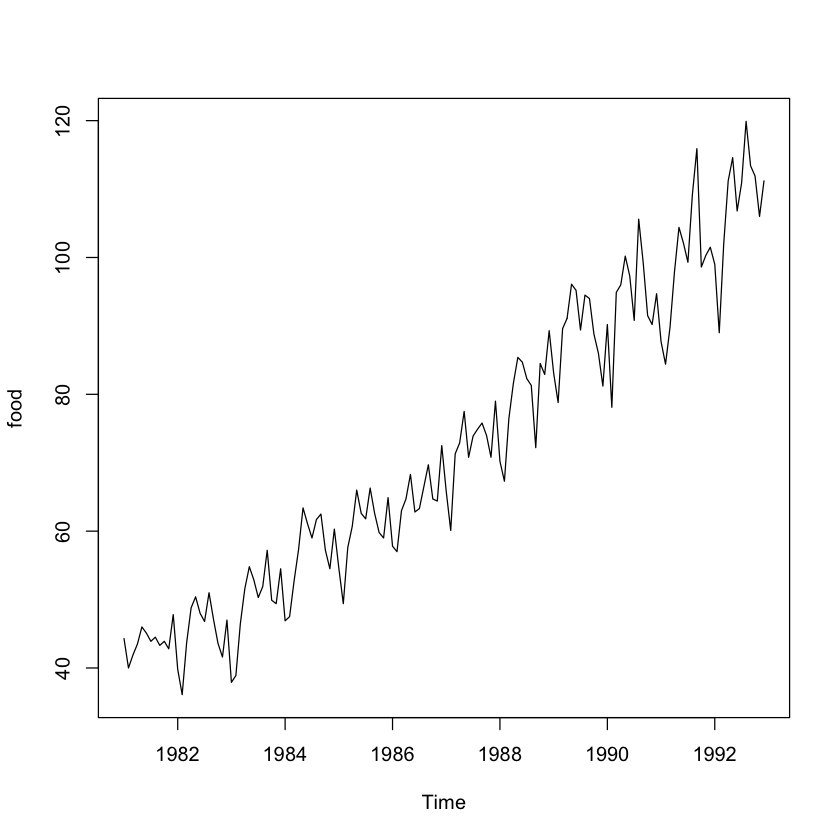

In [3]:
plot.ts(food)

### 이분산성 제거를 위한 변수 변환

- 승법모형 써도 되지만 여기서는 로그변환하고 가법모형 사용할 예정

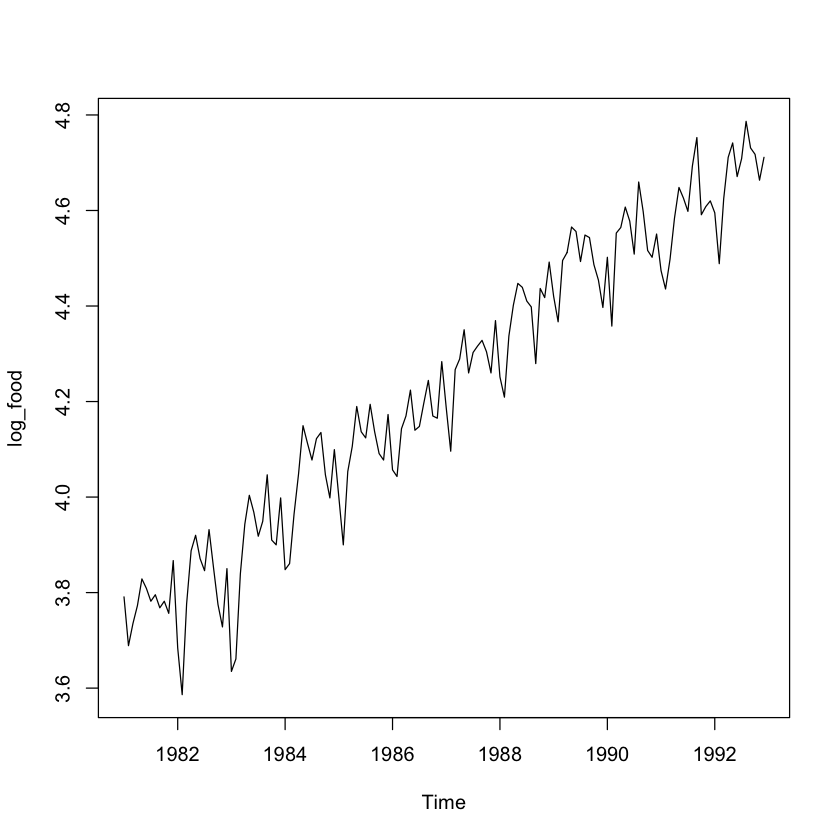

In [4]:
log_food <- log(food)
plot.ts(log_food)

### 추세성분 추정

In [5]:
fit <- lm(log_food ~ t)
summary(fit)


Call:
lm(formula = log_food ~ t)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.251154 -0.042190  0.009368  0.051058  0.147910 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 3.705715   0.012870  287.94   <2e-16 ***
t           0.007216   0.000154   46.86   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.07682 on 142 degrees of freedom
Multiple R-squared:  0.9393,	Adjusted R-squared:  0.9388 
F-statistic:  2195 on 1 and 142 DF,  p-value: < 2.2e-16


- 해석 : p-value보면 유의하고 R-squared도 매우 높게 나옴.

In [6]:
trend <- fitted(fit)

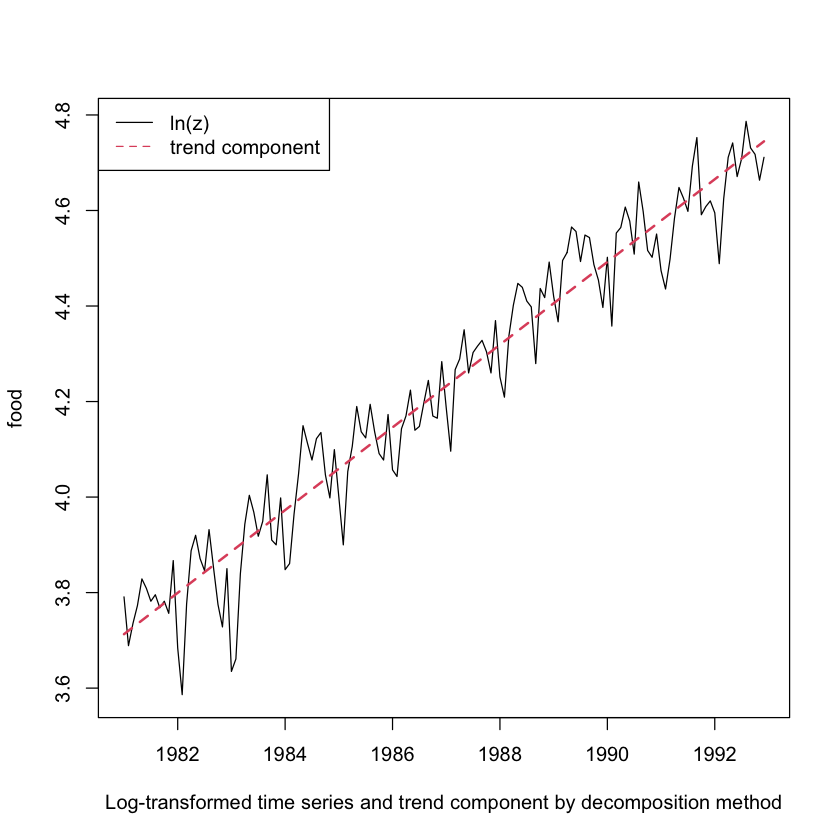

In [7]:
ts.plot(log_food, trend, col = 1:2, lty = 1:2, lwd = 1:2, ylab = "food", xlab = 
        "Log-transformed time series and trend component by decomposition method")
legend("topleft", lty = 1:2, col = 1:2, c("ln(z)", "trend component"))

### 원시계열에서 추세성분 조정

- 추세성분을 구했으니 원래데이터에서 추세성분을 빼준다.<br>
그러면 계절성분과 불규칙성분만 남음.<br>
거기서 계절성분까지 빼주려면 계절성분도 구해야한다.

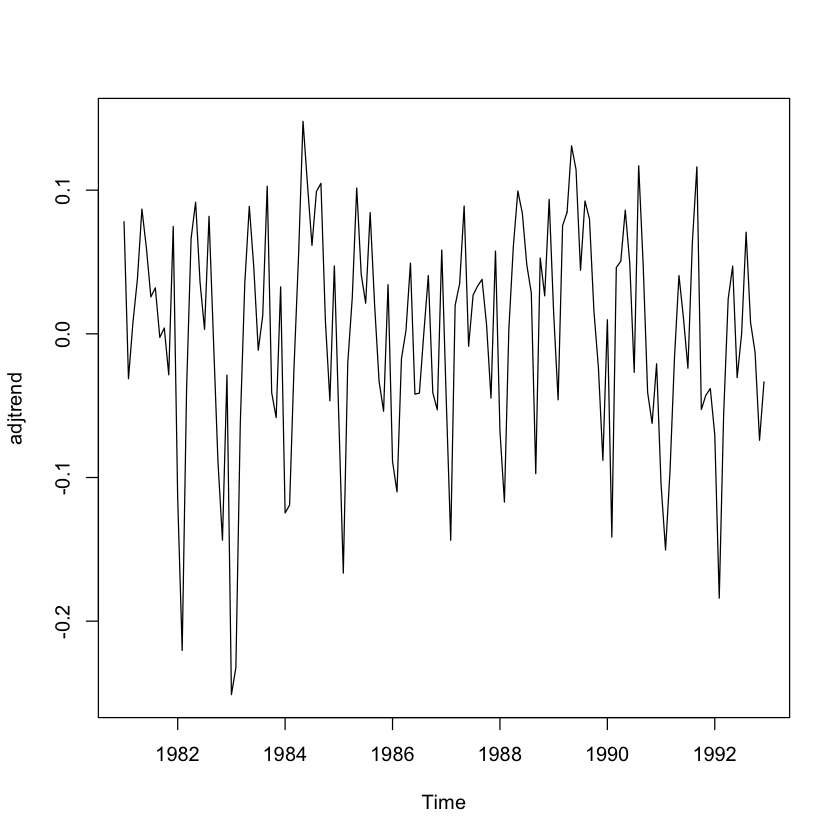

In [8]:
adjtrend = log_food-trend
plot.ts(adjtrend)

### 지시함수를 이용한 계절성분 추정

- 계절성분에 추세법을 이용하기 위해서는 sin함수 이용하거나 지시함수를 이용하면되는데 여기서는 지시함수 이용함.<br>
사이클 자체를 설명변수로 넣을거임.<br>
근데 여기서 cycle은 숫자가 아니라 1월, 2월의 의미이기에 factor형으로 바꿔준다.<br>
factor형으로 바꿔주면 Level이 생김.

In [9]:
y = factor(cycle(adjtrend))
y

[1] 1  2  3  4  5  6  7  8  9  10 11 12 1  2  3  4  5  6  7  8  9  10 11 12 1 
 [26] 2  3  4  5  6  7  8  9  10 11 12 1  2  3  4  5  6  7  8  9  10 11 12 1  2 
 [51] 3  4  5  6  7  8  9  10 11 12 1  2  3  4  5  6  7  8  9  10 11 12 1  2  3 
 [76] 4  5  6  7  8  9  10 11 12 1  2  3  4  5  6  7  8  9  10 11 12 1  2  3  4 
[101] 5  6  7  8  9  10 11 12 1  2  3  4  5  6  7  8  9  10 11 12 1  2  3  4  5 
[126] 6  7  8  9  10 11 12 1  2  3  4  5  6  7  8  9  10 11 12
Levels: 1 2 3 4 5 6 7 8 9 10 11 12

- 지시함수를 사용하기 위해 여기서는 intercept를 0으로 놓았음.

In [10]:
fit1 <- lm(adjtrend ~ 0 + y)
summary(fit1)


Call:
lm(formula = adjtrend ~ 0 + y)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.182321 -0.028501  0.000597  0.025663  0.146887 

Coefficients:
    Estimate Std. Error t value Pr(>|t|)    
y1  -0.06883    0.01423  -4.837 3.61e-06 ***
y2  -0.13853    0.01423  -9.735  < 2e-16 ***
y3  -0.01290    0.01423  -0.907 0.366289    
y4   0.03840    0.01423   2.699 0.007872 ** 
y5   0.08825    0.01423   6.201 6.69e-09 ***
y6   0.03871    0.01423   2.720 0.007401 ** 
y7   0.01061    0.01423   0.746 0.457221    
y8   0.05972    0.01423   4.197 4.94e-05 ***
y9   0.03776    0.01423   2.653 0.008945 ** 
y10 -0.01856    0.01423  -1.304 0.194518    
y11 -0.05041    0.01423  -3.542 0.000549 ***
y12  0.01577    0.01423   1.108 0.269816    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.0493 on 132 degrees of freedom
Multiple R-squared:  0.6172,	Adjusted R-squared:  0.5824 
F-statistic: 17.73 on 12 and 132 DF,  p-value: < 2.2e-16


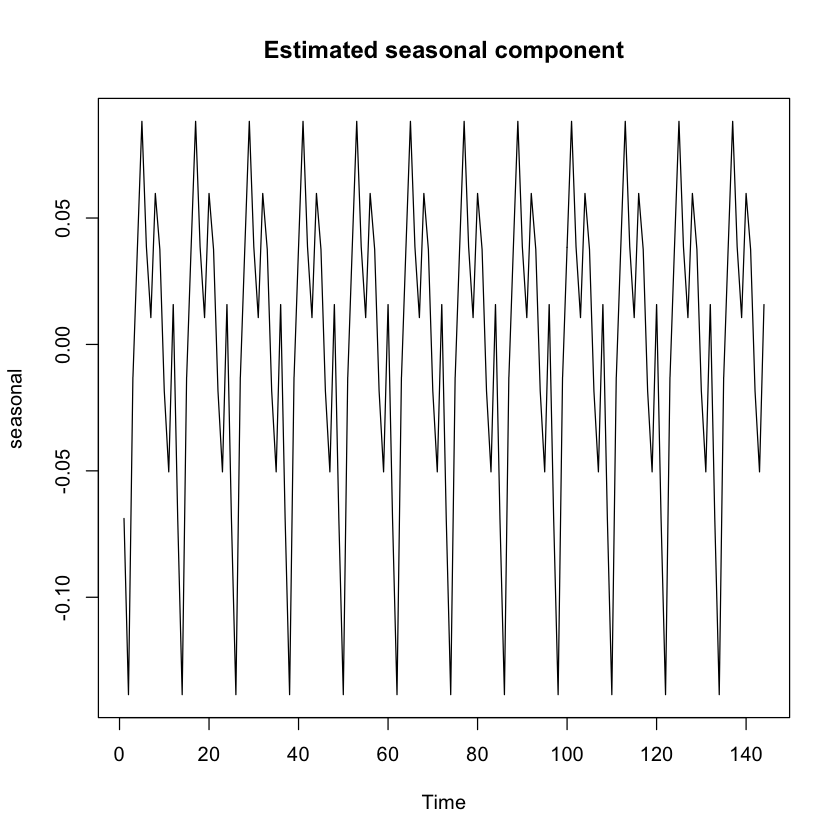

In [11]:
seasonal <- fitted(fit1)
ts.plot(seasonal, main = "Estimated seasonal component")

### 추정값

In [12]:
pred <- trend + seasonal

- trend는 단순선형을 사용해서 구했고, seasoanl은 지시함수를 사용해서 구했음.

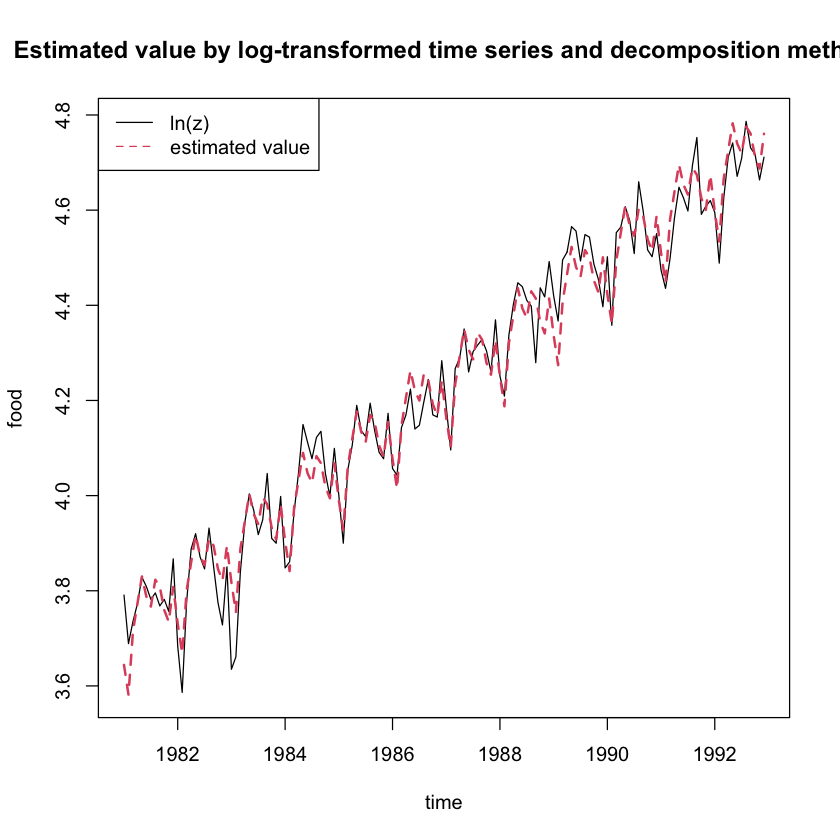

In [13]:
ts.plot(log_food, pred, col = 1:2, lty = 1:2, lwd = 1:2, ylab = "food", xlab = "time",
        main="Estimated value by log-transformed time series and decomposition method")
legend("topleft", lty = 1:2, col = 1:2, c("ln(z)", "estimated value"))

### 잔차검토

- 최종적으로 잔차에 대해서 보려고 했기에 살펴보면

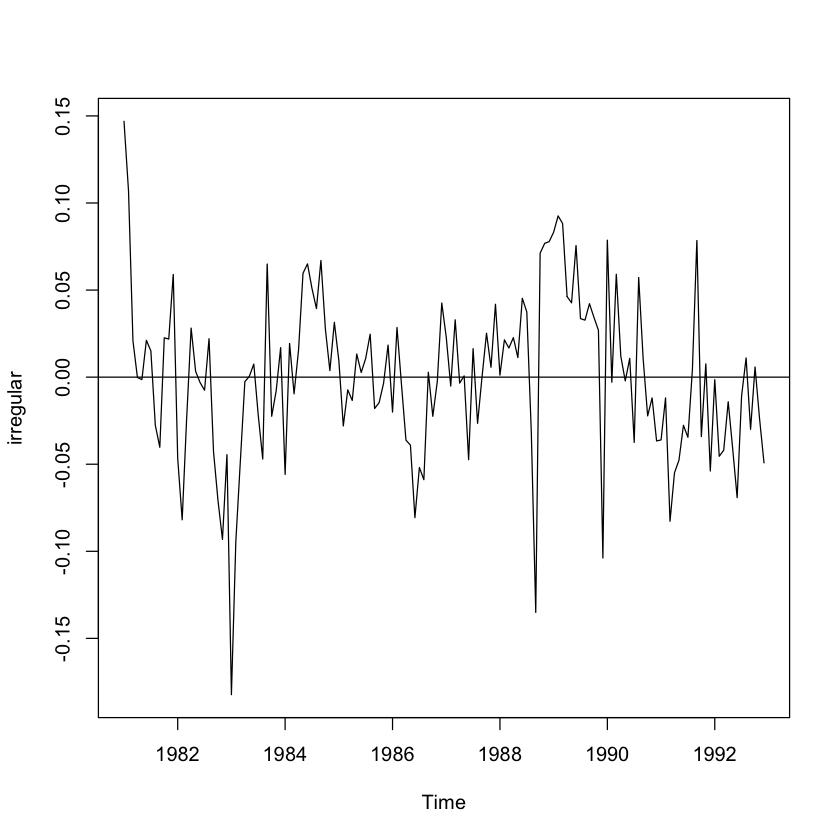

In [14]:
irregular <- log_food - pred
ts.plot(irregular)
abline(h = 0)

- 겉 보기에 문제는 별로 없어보이지만 더빈왓슨 테스트를 해보면

In [15]:
dwtest(lm(irregular ~ 1), alternative = 'two.sided')


	Durbin-Watson test

data:  lm(irregular ~ 1)
DW = 1.0803, p-value = 2.748e-08
alternative hypothesis: true autocorrelation is not 0


- 자기상관관계가 있다고 나옴, 이런건 모델링을 해주어야하는데 5장 이후에 알려줌.

## 분해법 : 승법모형

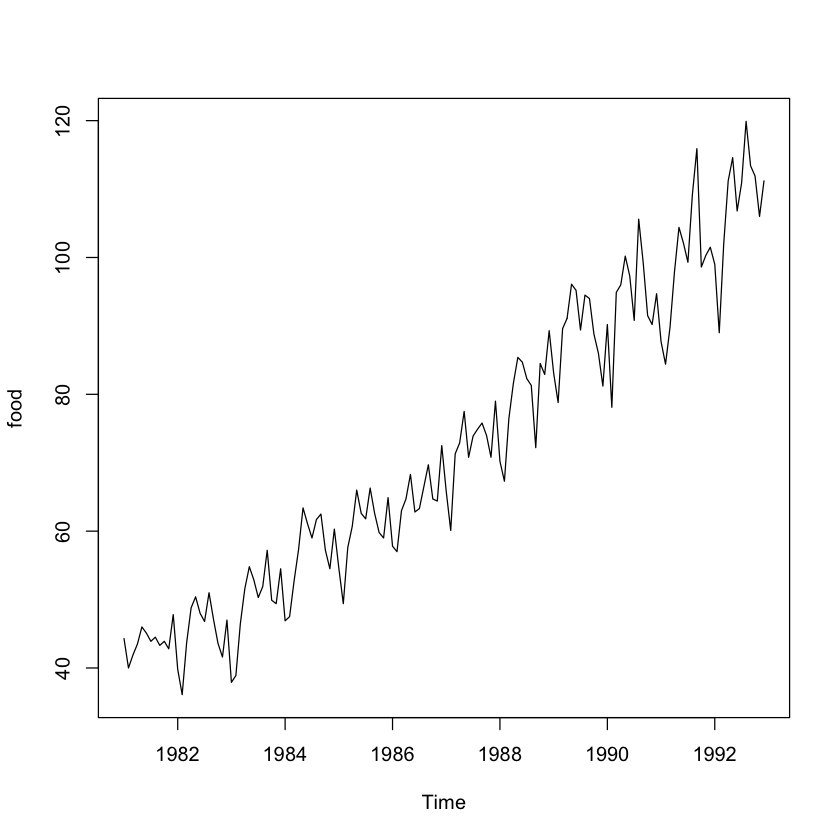

In [16]:
plot.ts(food)

### 추세성분 추정

- trend 잘 안잡힌것 같아서 t^2추가해도 됨.<br>
이거 lm에 추가할 때 I()하고 넣어야 들어감. 바로 쓰면 추가 안됨.

In [17]:
fit3 <- lm(food ~ t) #+ I(t^2))
summary(fit3)


Call:
lm(formula = food ~ t)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.0331  -3.4505  -0.1355   4.2911  15.3948 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 35.28614    0.95561   36.92   <2e-16 ***
t            0.50557    0.01143   44.21   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.704 on 142 degrees of freedom
Multiple R-squared:  0.9323,	Adjusted R-squared:  0.9318 
F-statistic:  1955 on 1 and 142 DF,  p-value: < 2.2e-16


In [18]:
trend <- fitted(fit3)

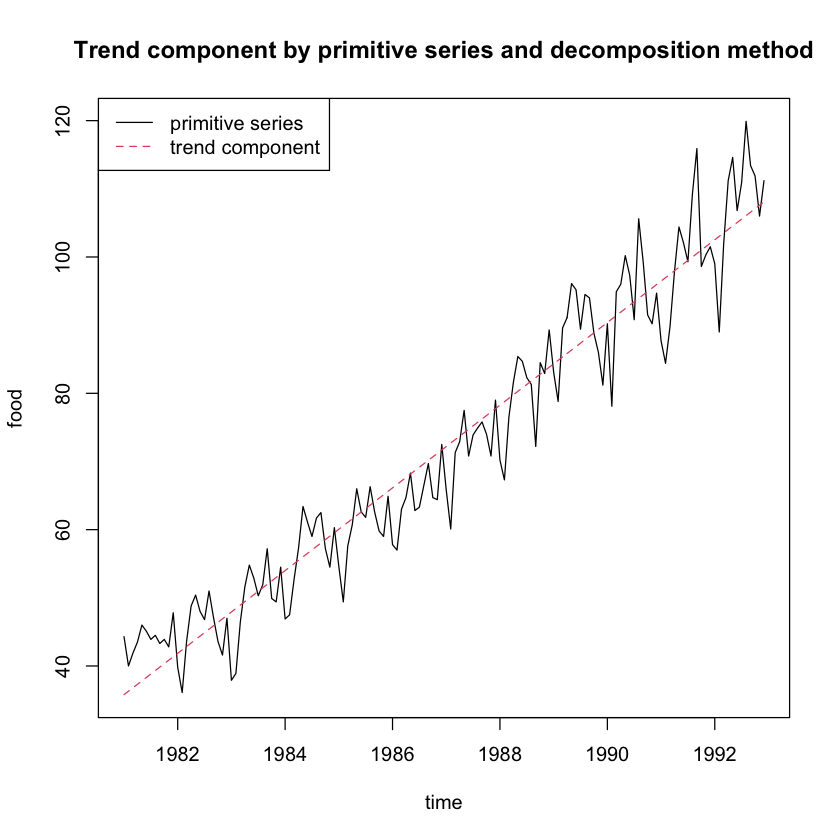

In [19]:
ts.plot(food, trend, col = 1:2, lty = 1:2, ylab = "food", xlab = "time",
        main = "Trend component by primitive series and decomposition method")
legend("topleft", lty = 1:2, col = 1:2, c("primitive series", "trend component"))

- 가법모형과 비슷해 보이지만 다름.

### 원시계열에서 추세성분 조정

- 나눠주면 계절성분과 불규칙 성분만 남음.

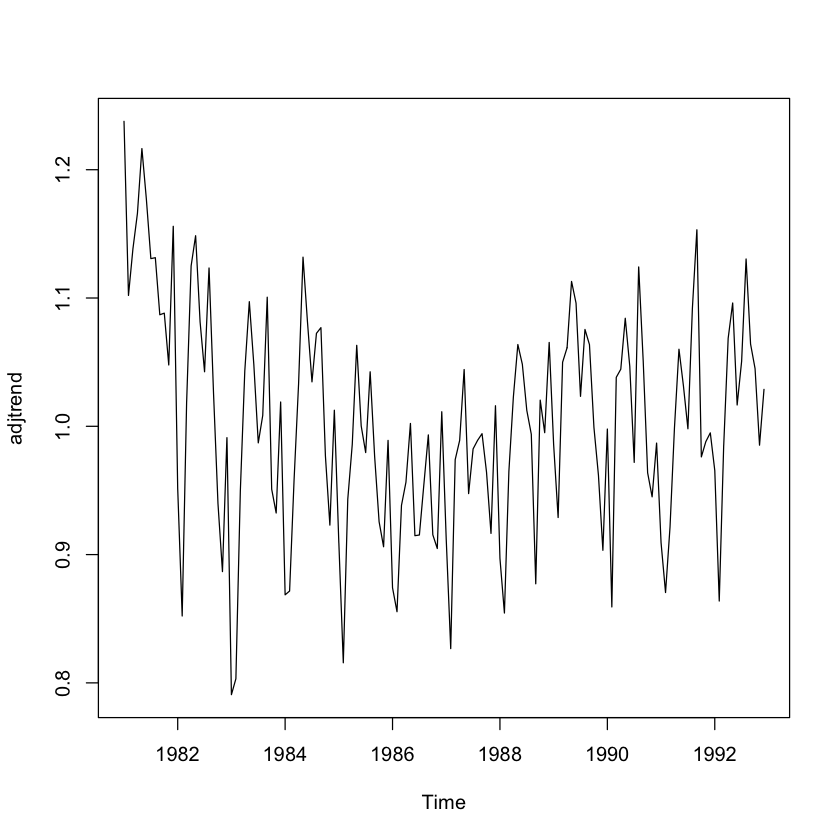

In [20]:
adjtrend = food/trend
plot.ts(adjtrend)

### 지시함수를 이용한 계절성분 추정

In [21]:
y = factor(cycle(adjtrend))

- 추세가 제거된 모형

In [22]:
fit4 <- lm(adjtrend ~ 0+y)
fit4 %>% summary


Call:
lm(formula = adjtrend ~ 0 + y)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.161461 -0.039085 -0.006972  0.032830  0.296240 

Coefficients:
    Estimate Std. Error t value Pr(>|t|)    
y1   0.94148    0.01922   48.98   <2e-16 ***
y2   0.87529    0.01922   45.54   <2e-16 ***
y3   0.99012    0.01922   51.51   <2e-16 ***
y4   1.04123    0.01922   54.17   <2e-16 ***
y5   1.09340    0.01922   56.88   <2e-16 ***
y6   1.04083    0.01922   54.15   <2e-16 ***
y7   1.01069    0.01922   52.58   <2e-16 ***
y8   1.06149    0.01922   55.22   <2e-16 ***
y9   1.03869    0.01922   54.04   <2e-16 ***
y10  0.98045    0.01922   51.01   <2e-16 ***
y11  0.94939    0.01922   49.39   <2e-16 ***
y12  1.01452    0.01922   52.78   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.06658 on 132 degrees of freedom
Multiple R-squared:  0.996,	Adjusted R-squared:  0.9956 
F-statistic:  2733 on 12 and 132 DF,  p-value: < 2.2e-16


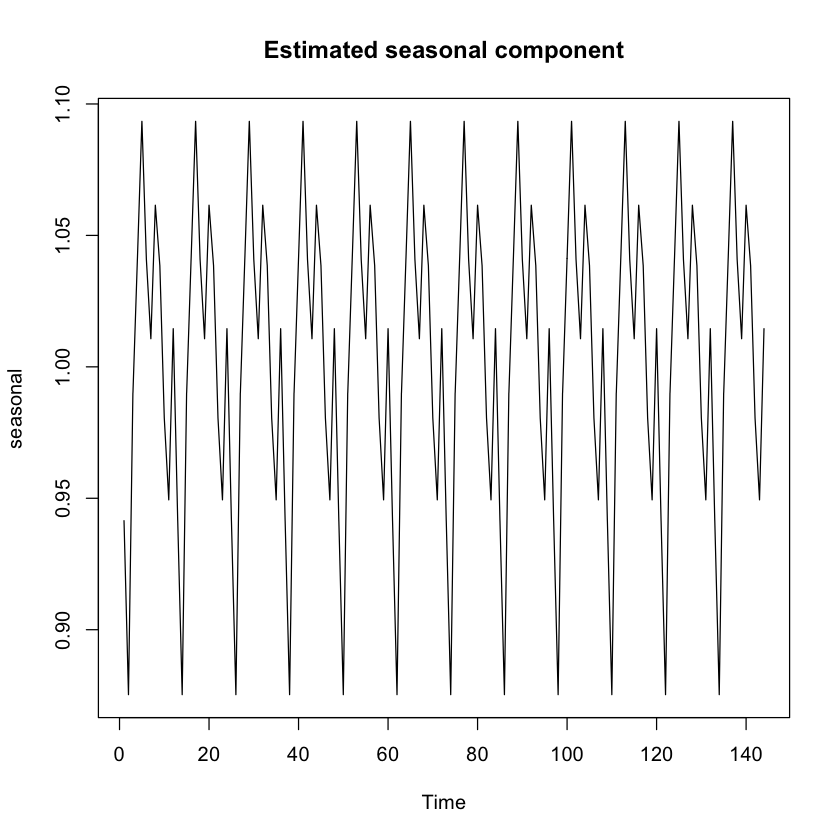

In [23]:
seasonal <- fitted(fit4)
ts.plot(seasonal, main = "Estimated seasonal component")

### 추정값

In [24]:
pred <- trend * seasonal

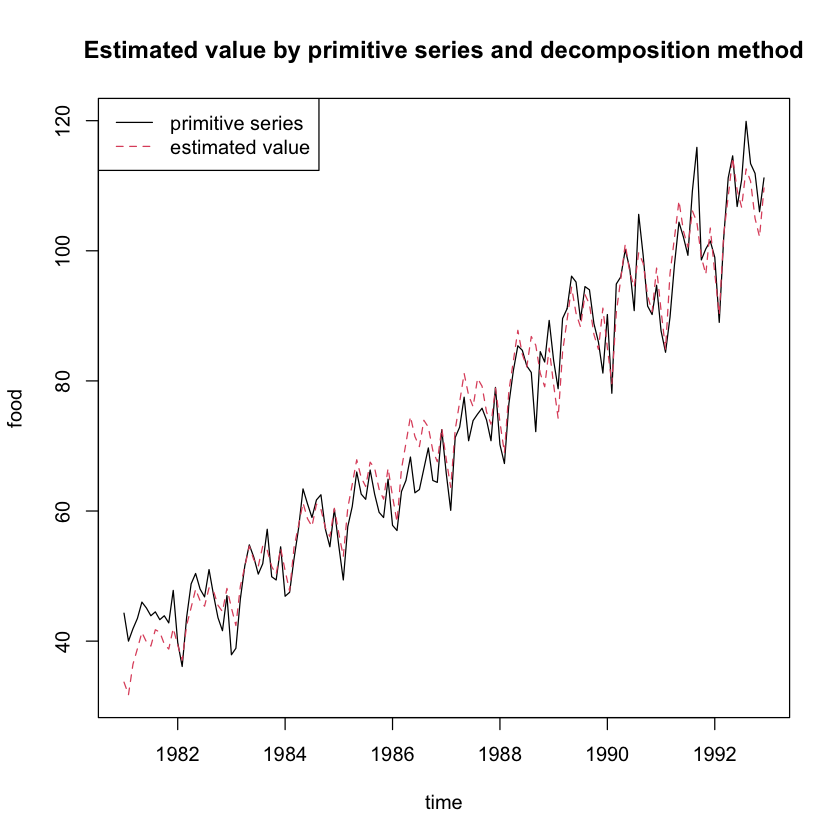

In [25]:
ts.plot(food, pred, col = 1:2, lty = 1:2, ylab = "food", xlab = "time",
        main = "Estimated value by primitive series and decomposition method")
legend("topleft", lty = 1:2, col = 1:2, c("primitive series", "estimated value"))

### 잔차검토

In [26]:
irregular <- food/pred

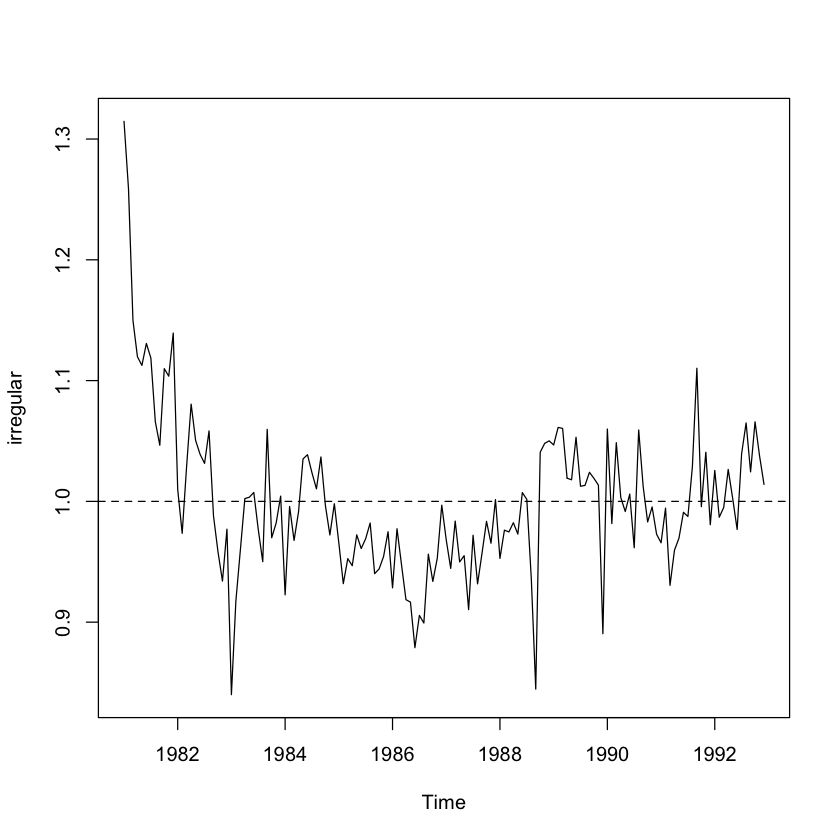

In [27]:
ts.plot(irregular)
abline(h = 1, lty = 2)

In [28]:
dwtest(lm(irregular ~ 1), alternative = 'two.sided')


	Durbin-Watson test

data:  lm(irregular ~ 1)
DW = 0.57136, p-value < 2.2e-16
alternative hypothesis: true autocorrelation is not 0


## 단순이동평균과 중심이동평균

`-` 원래 데이터

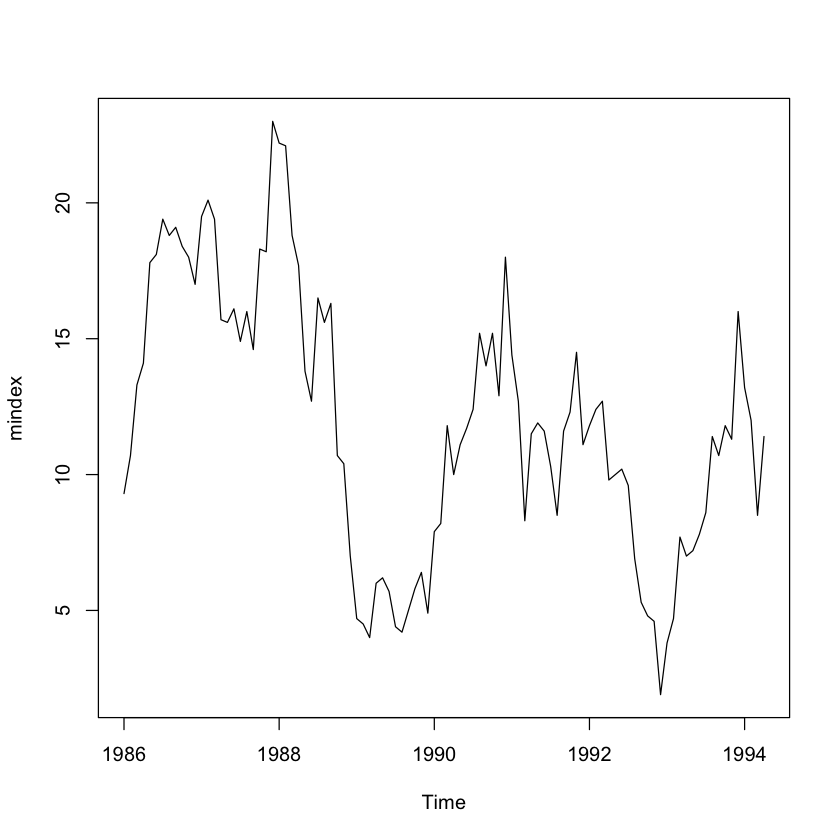

In [29]:
z <- scan('mindex.txt')
mindex <- ts(z, start = c(1986, 1), frequency = 12)
plot.ts(mindex)

- 단순이동평균 : smoothing해주려고 사용<br>
예를 들어 단순이동평균의 경우 window가 5라고 하면 앞에 4개는 결과가 없음.<br>
but, 중심이동평균은 5개이면 위는 4번째까지 합해서 5번째부터 결과 나타나는 식이라면 중심이동은 5개의 중심값 3번째부터 결과나옴. 좀 더 유연한 결과<br>
예측에서는 사용 불가, 왜냐하면 5개의 경우 하나는 현재 2개는 과거 2개는 미래정보를 사용하기에

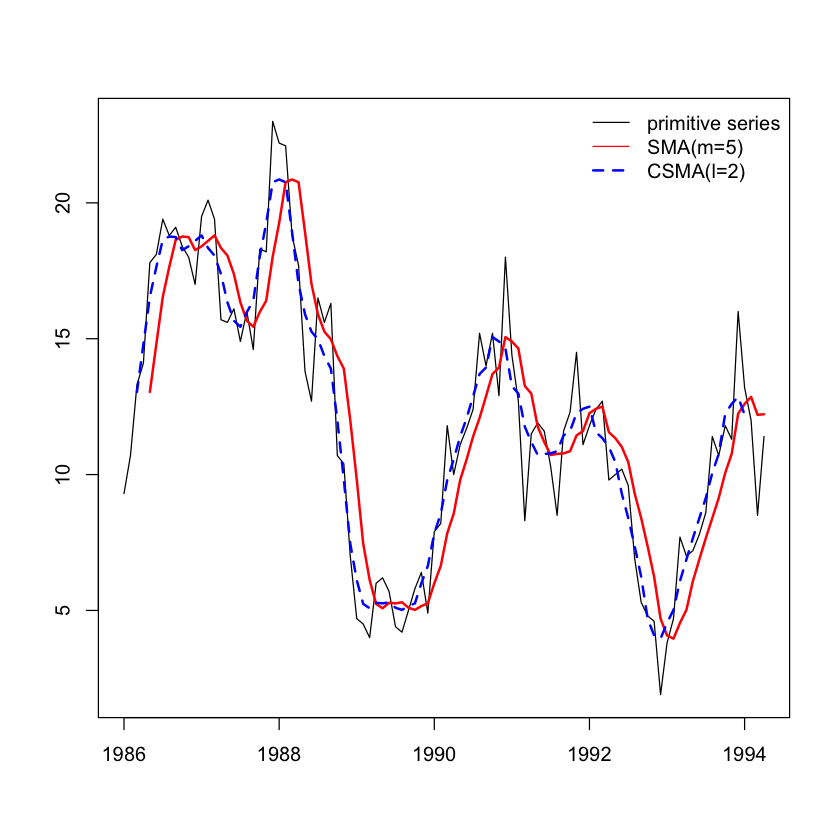

In [30]:
plot.ts(mindex, ylab = "", xlab = "")
lines(SMA(mindex, n = 5), col = 'red', lwd = 2) #처음 4개 안나오는 거 볼 수 있음
lines(ma(mindex, order = 5), col = 'blue', lty = 2, lwd = 2) # 두칸 일찍 나오는 거 보임
legend('topright', lty = c(1,1,2), col = c('black', 'red', 'blue'),
       lwd = c(1, 1, 2),
       c('primitive series', "SMA(m=5)", "CSMA(l=2)"),
       bty = 'n')

## 이동평균을 이용한 분해법

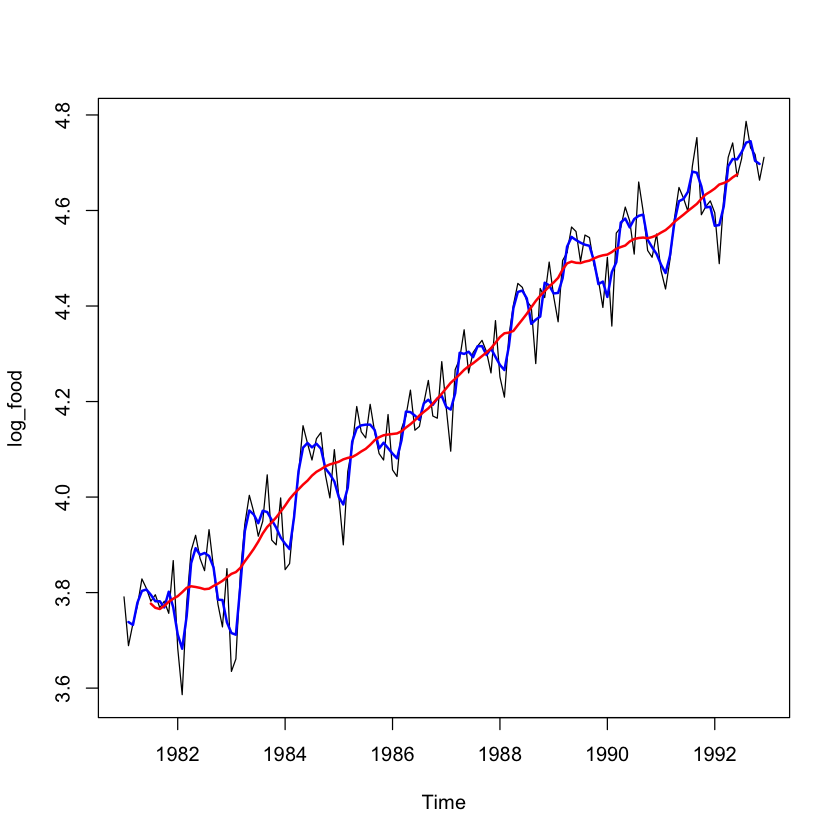

In [31]:
plot.ts(log_food)
lines(ma(log_food, 3), col = 'blue', lwd = 2)
lines(ma(log_food, 12), col = 'red', lwd = 2) # 거의 추세만 남아버림.(왜냐면 12개씩이면 1년씩이 묶인거라 계절성이 없어짐)

- 함수 stl, decompose 두개 다 사용가능

### stl

- 원하는 3개의 성분으로 쪼개서 보여줌

In [32]:
stl_fit1 <- stl(log_food, s.window = 12)
stl_fit1$time.series %>% head

,seasonal,trend,remainder
Jan 1981,-0.09035504,3.789108,0.09223150
Feb 1981,-0.14793139,3.787232,0.04957932
Mar 1981,-0.01989614,3.785355,-0.03017285
Apr 1981,0.03829580,3.783478,-0.04901299
May 1981,0.09453872,3.782254,-0.04815173
Jun 1981,0.04378729,3.781031,-0.01593573


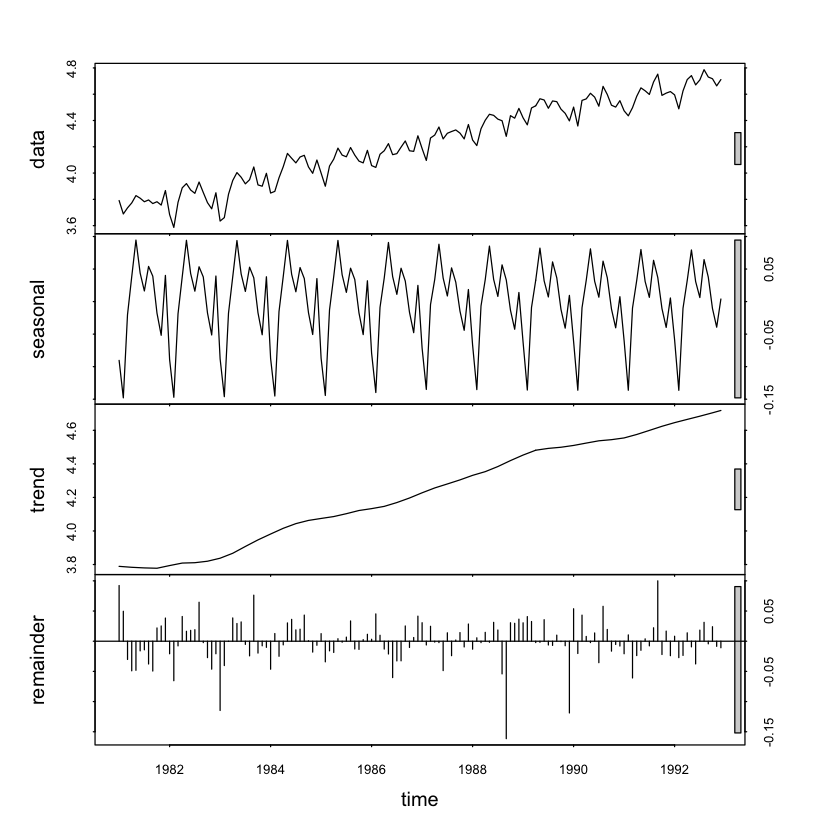

In [33]:
plot(stl_fit1)

- 실제 예측값은 trend + seasonal

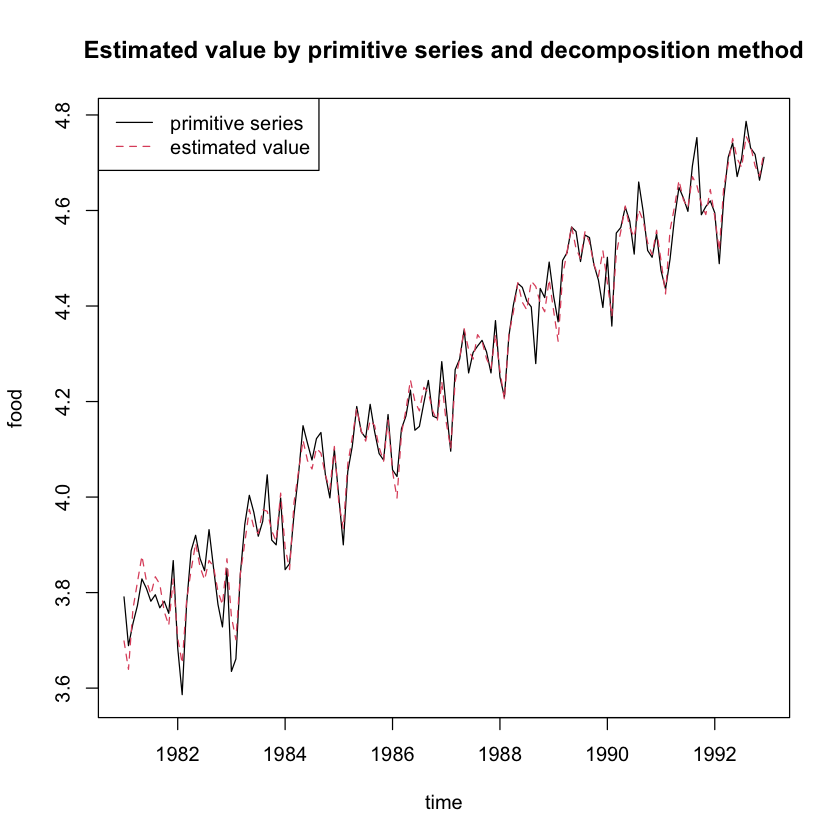

In [34]:
pred_stl <- stl_fit1$time.series[,1] + stl_fit1$time.series[,2]

ts.plot(log_food, pred_stl, col = 1:2, lty = 1:2, ylab = "food", xlab = "time",
        main = "Estimated value by primitive series and decomposition method")
legend("topleft", lty = 1:2, col = 1:2, c("primitive series", "estimated value"))

### decompose_가법모형

- 밑에 additive써줬는데 안써도 되긴함.

In [35]:
dec_fit <- decompose(log_food, 'additive')
dec_fit$trend[1:10]
ma(log_food, 12)[1:10]

[1]       NA       NA       NA       NA       NA       NA 3.776909 3.768171
 [9] 3.765650 3.772193

[1]       NA       NA       NA       NA       NA       NA 3.776909 3.768171
 [9] 3.765650 3.772193

In [36]:
dec_fit$seasonal[1:24]

[1] -0.07990209 -0.14604380 -0.01274493  0.04049678  0.09068184  0.03967867
 [7]  0.01048177  0.05876191  0.04134155 -0.01793742 -0.04690019  0.02208592
[13] -0.07990209 -0.14604380 -0.01274493  0.04049678  0.09068184  0.03967867
[19]  0.01048177  0.05876191  0.04134155 -0.01793742 -0.04690019  0.02208592

- 계절성분이라는 것은 12개월마다 반복되는 것이라 12까지 돌고 똑같이 나옴.

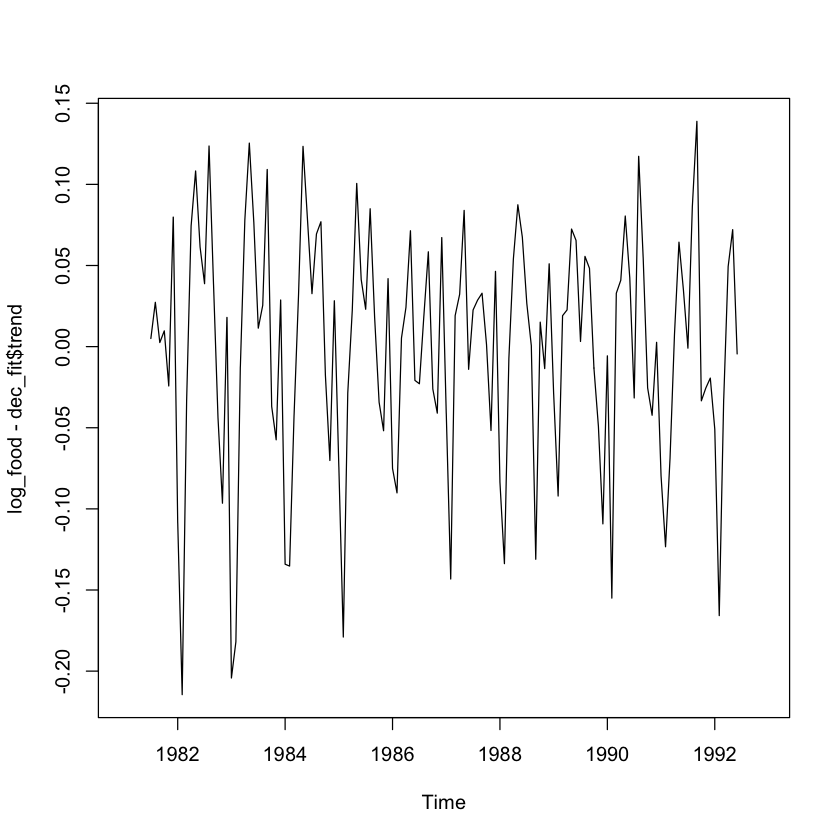

In [37]:
plot.ts(log_food - dec_fit$trend)

`-` 1~12월까지의 평균

In [38]:
x <- log_food - dec_fit$trend
b <- tapply(x, cycle(x), function(y) mean(y, na.rm = T))
b - mean(b)

1           2           3           4           5           6 
-0.07990209 -0.14604380 -0.01274493  0.04049678  0.09068184  0.03967867 
          7           8           9          10          11          12 
 0.01048177  0.05876191  0.04134155 -0.01793742 -0.04690019  0.02208592

In [39]:
dec_fit$random[1:10]

[1]           NA           NA           NA           NA           NA
 [6]           NA -0.005476607 -0.031444194 -0.038838544  0.027659131

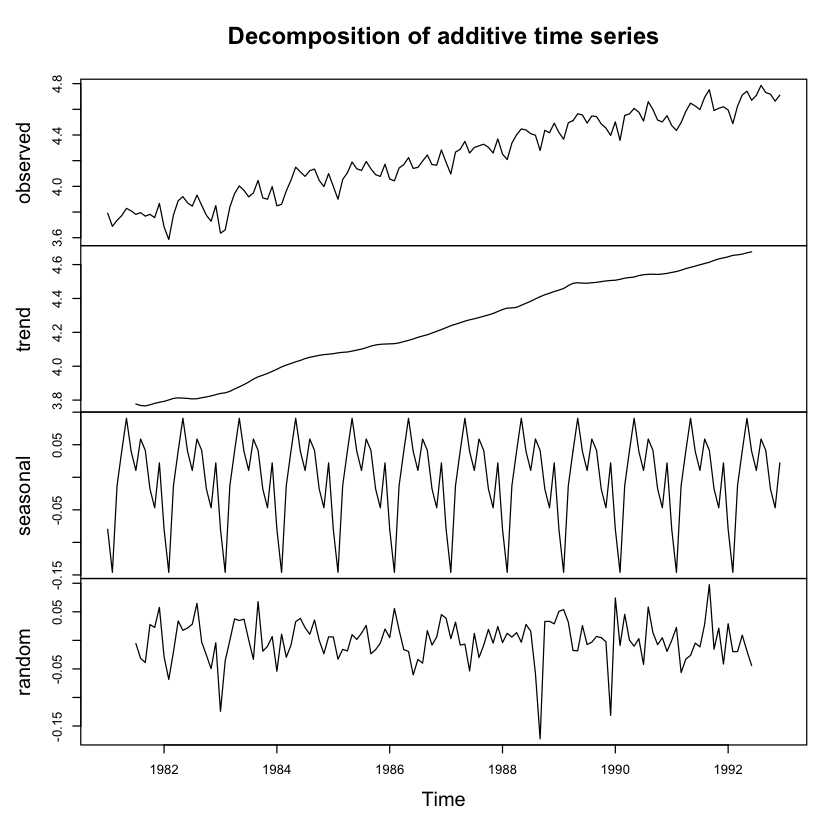

In [40]:
plot(dec_fit)

- predict = trend + seasonal

In [41]:
pred_dec <- dec_fit$trend + dec_fit$seasonal

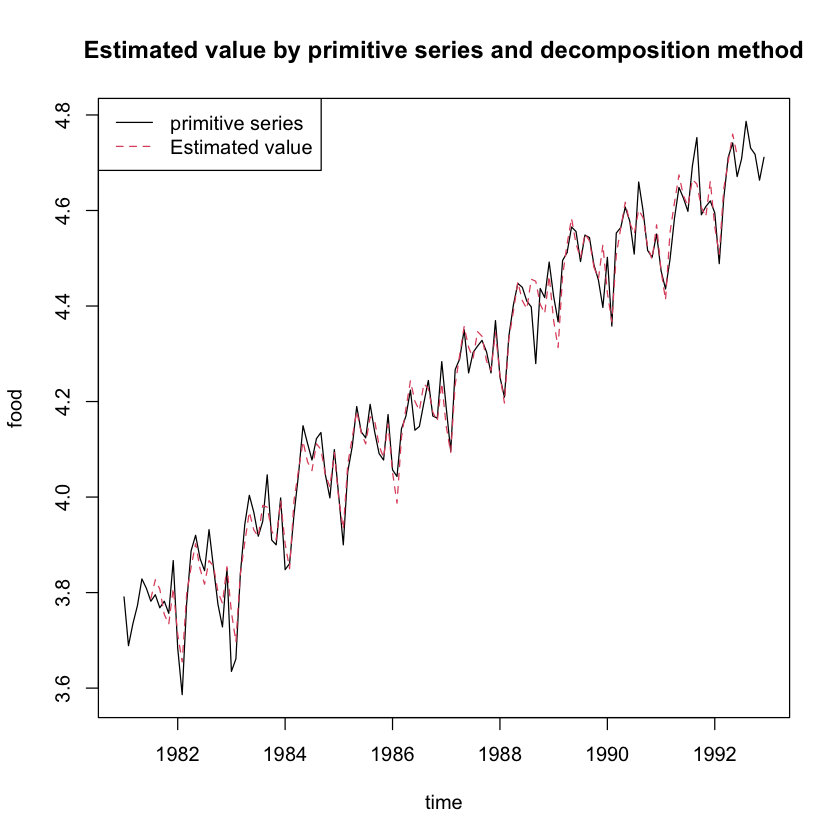

In [42]:
ts.plot(log_food, pred_dec, col = 1:2, lty = 1:2, ylab = "food", xlab = "time",
        main = "Estimated value by primitive series and decomposition method")
legend("topleft", lty = 1:2, col = 1:2, c("primitive series", "Estimated value"))

### stl vs decompose

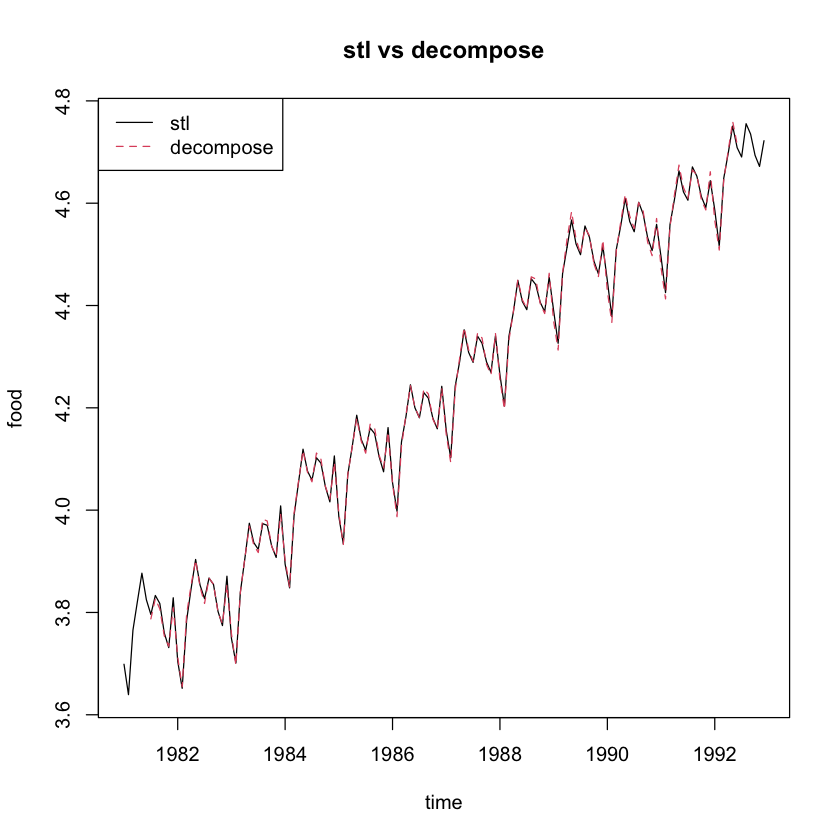

In [43]:
ts.plot(pred_stl, pred_dec, col = 1:2, lty = 1:2, ylab = "food", xlab = "time",
        main = "stl vs decompose")
legend("topleft", lty = 1:2, col = 1:2, c("stl", "decompose"))

- 거의 비슷하게 나온다?

### decompose_승법모형

In [44]:
dec_fit2 <- decompose(food, type = "multiplicative")
dec_fit2$trend[1:10]
dec_fit2$seasonal[1:15]
dec_fit2$random[1:10]

[1]       NA       NA       NA       NA       NA       NA 43.72917 43.37917
 [9] 43.29167 43.58750

[1] 0.9219246 0.8621213 0.9844960 1.0380042 1.0916505 1.0378593 1.0080029
 [8] 1.0591710 1.0427540 0.9807592 0.9523825 1.0208744 0.9219246 0.8621213
[15] 0.9844960

[1]        NA        NA        NA        NA        NA        NA 0.9959362
 [8] 0.9685292 0.9591835 1.0269284

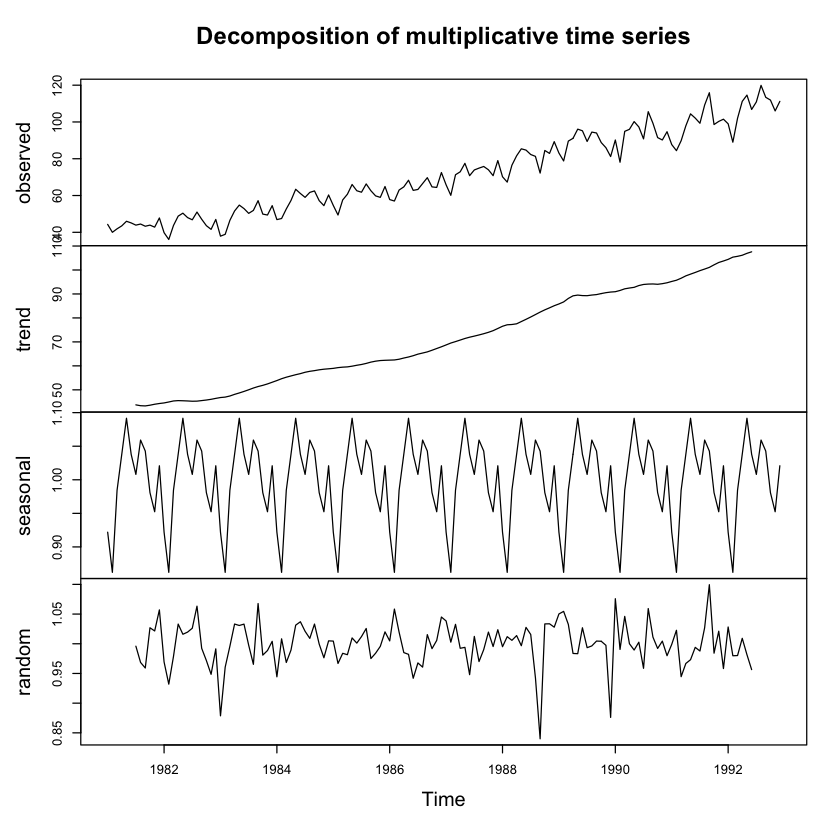

In [45]:
plot(dec_fit2)

In [46]:
pred_dec2 <- dec_fit2$trend*dec_fit2$seasonal

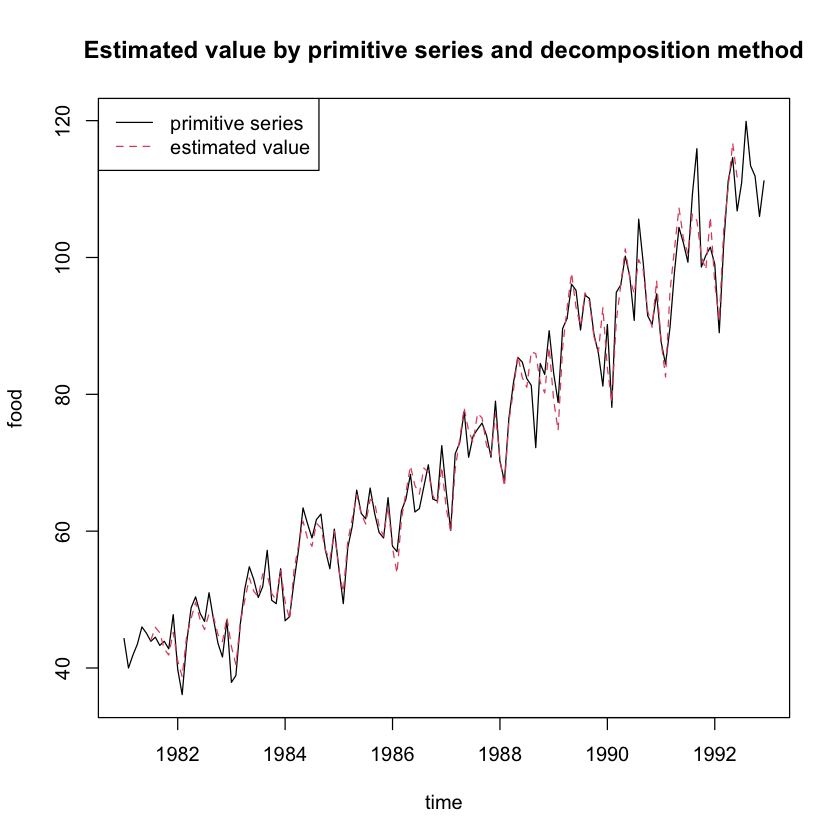

In [47]:
ts.plot(food, pred_dec2, col = 1:2, lty = 1:2, ylab = "food", xlab = "time",
        main = "Estimated value by primitive series and decomposition method")
legend("topleft", lty = 1:2, col = 1:2, c("primitive series", "estimated value"))

### 가법모형 vs 승법모형

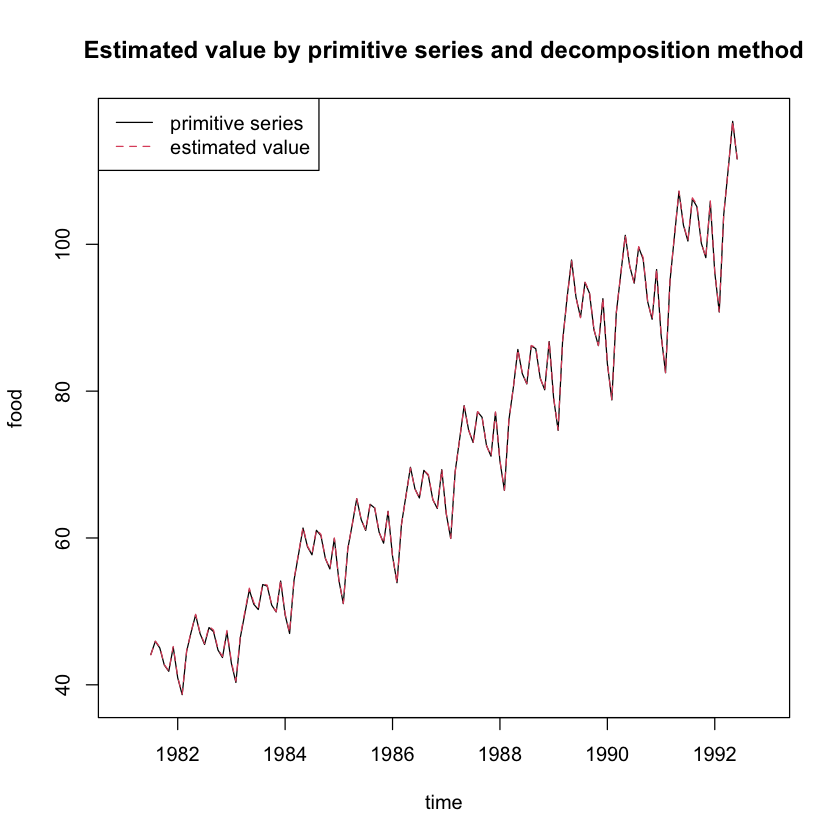

In [48]:
ts.plot(exp(pred_dec), pred_dec2, col = 1:2, lty = 1:2, ylab = "food", xlab = "time",
        main = "Estimated value by primitive series and decomposition method")
legend("topleft", lty = 1:2, col = 1:2, c("primitive series", "estimated value"))

- 비슷하게 나온다.<br>
추세모형은 회귀모형을 써서 예측값이 좀 다르게 나오는데 이건 좀 비슷하다.

- 결론 : 이분산성이 있는 경우 승법모형을 써야되지만 로그변환이후 가법모형을 사용해도 된다.<br>
분해법에는 추세이용, 평활법이 있다.<br>
평활법을 이용할 때에는 일반적인 이동법과 중심이동법이 있는데 분해법에서 사용하는 평활을 위해서는 중심이동평균 쓰는 것이 더 좋다.